In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy

In [213]:
np.random.seed(42)

In [214]:
n = 100

First we'll draw an empirical distribution for the normal distribution and a confidence band to get a handle on things. Below, $X$ is an array of $n$ normal random variables. The graph of $\hat{F}_n$ is discontinuous at each point of $X$, so we need to double every point of $X$ except for the first in order to account for the discontinuities. That's what X_ below does.

In [215]:
X = np.random.normal(loc=0., scale=1., size=n)

In [216]:
X = np.sort(X)

In [217]:
X_ = np.repeat(X, repeats=2)[1:]

In [218]:
F_hat = np.repeat(1/n * np.arange(0, n, 1), repeats=2)[:-1]

Text(0.5, 1.0, 'Graph of empirical distribution $\\hat{F}_n$')

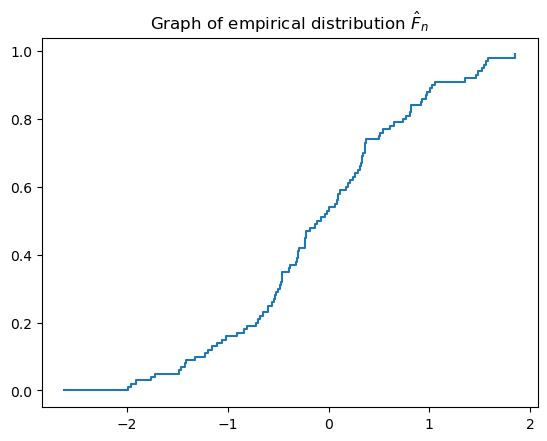

In [219]:
plt.plot(X_, F_hat)
plt.title('Graph of empirical distribution $\hat{F}_n$')

Below we graph a confidence band, using the strategy suggested by the Dvoretzky-Kiefer-Wolfowitz inequality (see the box on page 99). All of the variables below correspond to variables named in that box. 

In [220]:
alpha = 0.05

In [221]:
eps = np.sqrt(np.log(2/alpha) / (2*n))

In [222]:
L = np.maximum(F_hat - eps, 0)

In [223]:
U = np.minimum(F_hat + eps, 1)

In [224]:
x = np.arange(X_[0], X[-1], 0.1)

In [225]:
F = norm.cdf(x)

Here is the graph of the confidence band

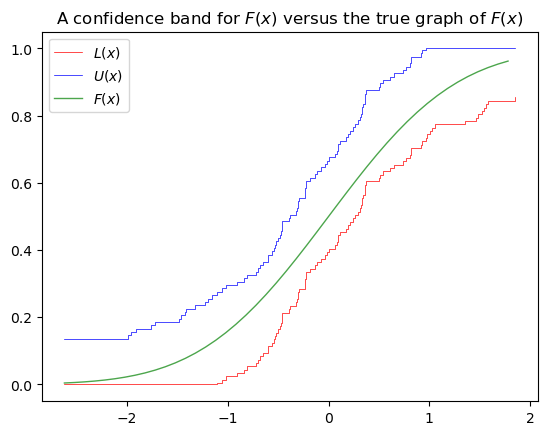

In [226]:
plt.plot(X_, L, linewidth=0.5, color='red', label='$L(x)$')
plt.plot(X_, U, linewidth=0.5, color='blue', label='$U(x)$')
plt.plot(x, F, linewidth=1, color='green', alpha=0.7, label='$F(x)$')
plt.title('A confidence band for $F(x)$ versus the true graph of $F(x)$')
plt.legend()
plt.show()

We need a way to test whether the CDF $F$ lies between $L(x)$ and $U(x)$ for each $x$. This will be true exactly if the following occurs. Let $X_1,\ldots,X_{100}$ be the random variables, in sorted order. Then we require that for each $X_i$, $F(X_i)$ is between $L(X_i)$ and $U(X_i)$ _and_ between $L(X_{i-1})$ and $U(X_{i-1})$. The variables L_shift and U_shift below are shifted versions of L and U allowing us to compare the value of $F(X_i)$ to $L(X_{i-1})$ and $U(X_{i-1})$. F_inside_band will be an array telling us, for each trial, whether the graph of $F$ is fully inside of the confidence band or not.

In [227]:
F_inside_band = np.zeros(1000)
Xs = [None] * 1000

for i in range(1000):
    X = np.random.normal(loc=0., scale=1., size=n)
    X = np.sort(X)
    Xs[i] = X
    F_hat = 1/n * np.arange(0, n, 1)
    F = norm.cdf(X)
    U = np.minimum(F_hat + eps, 1)
    L = np.maximum(F_hat - eps, 0)
    U_shift = np.delete(np.insert(U, 0, U[0]),n)
    L_shift = np.delete(np.insert(L, 0, L[0]),n)
    truth = (F > L) & (F < U) & (F > L_shift) & (F < U_shift)
    all_true = np.prod(truth)
    F_inside_band[i] = all_true

In [228]:
print('Total number of trials in which F lies inside the confidence band: {}'.format(int(np.sum(F_inside_band))))

Total number of trials in which F lies inside the confidence band: 950


Let's confirm by graphing that in these trials $F$ actually exits the confidence band somewhere.

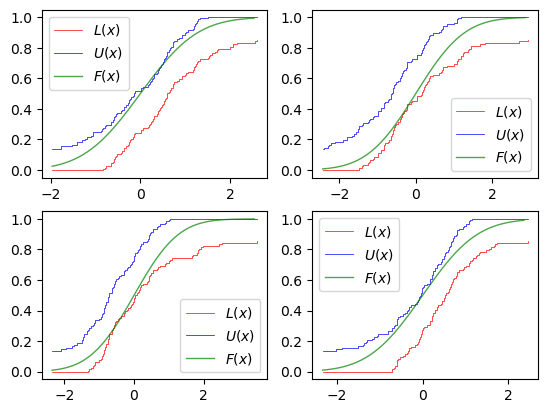

In [229]:
fig, axs = plt.subplots(2,2)

for i in range(4):
    j = np.where(F_inside_band == 0)[0][i]
    X = Xs[j]
    X_ = np.repeat(X, repeats=2)[1:]
    F_hat = np.repeat(1/n * np.arange(0, n, 1), repeats=2)[:-1]
    L = np.maximum(F_hat - eps, 0)
    U = np.minimum(F_hat + eps, 1)
    x = np.arange(X_[0], X[-1], 0.1)
    F = norm.cdf(x)
    
    ax = axs[i // 2][i % 2]
    
    ax.plot(X_, L, linewidth=0.5, color='red', label='$L(x)$')
    ax.plot(X_, U, linewidth=0.5, color='blue', label='$U(x)$')
    ax.plot(x, F, linewidth=1, color='green', alpha=0.7, label='$F(x)$')
    ax.legend()

plt.show()

We see in each of these four cases, the graph of $F$ just barely exits the confidence band.

Now we try the same experiment with Cauchy random variables.

In [230]:
X = np.random.standard_cauchy(n)

In [231]:
X = np.sort(X)

In [232]:
X_ = np.repeat(X, repeats=2)[1:]

In [233]:
F_hat = np.repeat(1/n * np.arange(0, n, 1), repeats=2)[:-1]

Text(0.5, 1.0, 'Graph of empirical distribution $\\hat{F}_n$')

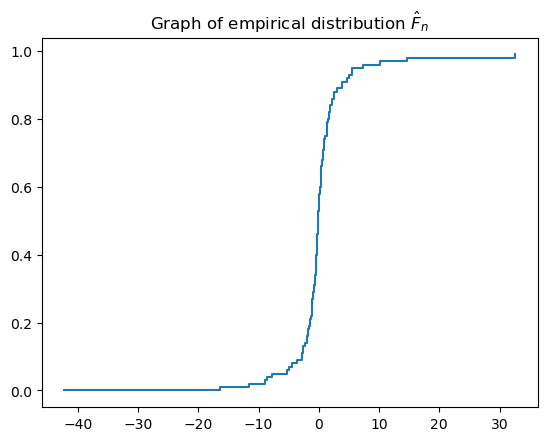

In [234]:
plt.plot(X_, F_hat)
plt.title('Graph of empirical distribution $\hat{F}_n$')

In [235]:
alpha = 0.05

In [236]:
eps = np.sqrt(np.log(2/alpha) / (2*n))

In [237]:
L = np.maximum(F_hat - eps, 0)

In [238]:
U = np.minimum(F_hat + eps, 1)

In [239]:
x = np.arange(X_[0], X[-1], 0.1)

In [240]:
F = cauchy.cdf(x)

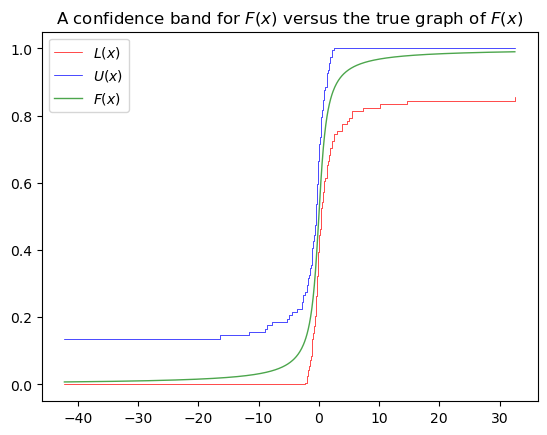

In [241]:
plt.plot(X_, L, linewidth=0.5, color='red', label='$L(x)$')
plt.plot(X_, U, linewidth=0.5, color='blue', label='$U(x)$')
plt.plot(x, F, linewidth=1, color='green', alpha=0.7, label='$F(x)$')
plt.title('A confidence band for $F(x)$ versus the true graph of $F(x)$')
plt.legend()
plt.show()

Here it's a little harder to see what's going on. Let's use the numerical condition on $F$ developed above to test when $F$ lies entirely inside the confidence band.

In [242]:
F_inside_band = np.zeros(1000)

for i in range(1000):
    X = np.random.standard_cauchy(size=n)
    X = np.sort(X)
    F_hat = 1/n * np.arange(0, n, 1)
    F = cauchy.cdf(X)
    U = np.minimum(F_hat + eps, 1)
    L = np.maximum(F_hat - eps, 0)
    U_shift = np.delete(np.insert(U, 0, U[0]),n)
    L_shift = np.delete(np.insert(L, 0, L[0]),n)
    truth = (F > L) & (F < U) & (F > L_shift) & (F < U_shift)
    all_true = np.prod(truth)
    F_inside_band[i] = all_true

In [243]:
print('Total number of trials in which F lies inside the confidence band: {}'.format(int(np.sum(F_inside_band))))

Total number of trials in which F lies inside the confidence band: 942
